In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('nc_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train =covid_train[['y', 'new_hospitalized_patients', 'new_deaths_1_lag', 'new_cases_350_lag', 'new_cases_150_lag', 'new_cases_10_mean', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_2_lag', 'new_cases_7_lag', 'current_intensive_care_patients', 'minimum_temperature_celsius', 'new_cases_1 lag', 'new_cases_10_max', 'new_cases_30_lag', 'new_cases_3_lag', 'maximum_temperature_celsius', 'new_deaths_7_lag', 'new_cases_10_std', 'new_cases_50_lag', 'new_deaths_50_mean']]
covid_test =covid_test[['y', 'new_hospitalized_patients', 'new_deaths_1_lag', 'new_cases_350_lag', 'new_cases_150_lag', 'new_cases_10_mean', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_2_lag', 'new_cases_7_lag', 'current_intensive_care_patients', 'minimum_temperature_celsius', 'new_cases_1 lag', 'new_cases_10_max', 'new_cases_30_lag', 'new_cases_3_lag', 'maximum_temperature_celsius', 'new_deaths_7_lag', 'new_cases_10_std', 'new_cases_50_lag', 'new_deaths_50_mean']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:4116.49849	validation_1-rmse:18997.80545
[1]	validation_0-rmse:4081.06984	validation_1-rmse:18949.04857
[2]	validation_0-rmse:4045.99704	validation_1-rmse:18900.80629
[3]	validation_0-rmse:4011.27654	validation_1-rmse:18853.03942
[4]	validation_0-rmse:3976.90537	validation_1-rmse:18805.77044
[5]	validation_0-rmse:3942.89373	validation_1-rmse:18763.72648
[6]	validation_0-rmse:3909.03617	validation_1-rmse:18710.96406
[7]	validation_0-rmse:3875.51781	validation_1-rmse:18658.72544
[8]	validation_0-rmse:3842.33552	validation_1-rmse:18607.00909
[9]	validation_0-rmse:3809.48632	validation_1-rmse:18555.81694
[10]	validation_0-rmse:3776.96067	validation_1-rmse:18511.84075
[11]	validation_0-rmse:3744.76008	validation_1-rmse:18468.38062
[12]	validation_0-rmse:3712.88089	validation_1-rmse:18425.29285
[13]	validation_0-rmse:3681.31990	validation_1-rmse:18382.71387
[14]	validation_0-rmse:3650.07311	validation_1-rmse:18340.39300
[15]	validation_0-rmse:3619.13786	validation_1-rms

[128]	validation_0-rmse:1471.35597	validation_1-rmse:15964.29106
[129]	validation_0-rmse:1460.47507	validation_1-rmse:15938.63214
[130]	validation_0-rmse:1450.16710	validation_1-rmse:15917.52980
[131]	validation_0-rmse:1439.96643	validation_1-rmse:15896.63600
[132]	validation_0-rmse:1429.37605	validation_1-rmse:15871.75224
[133]	validation_0-rmse:1419.33005	validation_1-rmse:15851.25176
[134]	validation_0-rmse:1409.24992	validation_1-rmse:15831.57487
[135]	validation_0-rmse:1399.32613	validation_1-rmse:15811.15689
[136]	validation_0-rmse:1389.11582	validation_1-rmse:15787.22567
[137]	validation_0-rmse:1379.49944	validation_1-rmse:15767.58528
[138]	validation_0-rmse:1369.48898	validation_1-rmse:15744.14461
[139]	validation_0-rmse:1360.05560	validation_1-rmse:15724.87475
[140]	validation_0-rmse:1350.11715	validation_1-rmse:15701.87824
[141]	validation_0-rmse:1340.86774	validation_1-rmse:15683.03407
[142]	validation_0-rmse:1331.13928	validation_1-rmse:15660.48476
[143]	validation_0-rmse:1

[256]	validation_0-rmse:649.65926	validation_1-rmse:14674.25544
[257]	validation_0-rmse:646.13758	validation_1-rmse:14670.55653
[258]	validation_0-rmse:642.62726	validation_1-rmse:14666.89715
[259]	validation_0-rmse:639.15418	validation_1-rmse:14663.27294
[260]	validation_0-rmse:635.70318	validation_1-rmse:14659.68336
[261]	validation_0-rmse:632.37113	validation_1-rmse:14656.12556
[262]	validation_0-rmse:629.07157	validation_1-rmse:14652.60109
[263]	validation_0-rmse:625.80454	validation_1-rmse:14649.10891
[264]	validation_0-rmse:622.51594	validation_1-rmse:14645.65306
[265]	validation_0-rmse:619.17679	validation_1-rmse:14642.21576
[266]	validation_0-rmse:615.99998	validation_1-rmse:14638.82184
[267]	validation_0-rmse:612.69144	validation_1-rmse:14635.44852
[268]	validation_0-rmse:609.44137	validation_1-rmse:14632.10267
[269]	validation_0-rmse:606.30005	validation_1-rmse:14628.80216
[270]	validation_0-rmse:603.07947	validation_1-rmse:14625.52299
[271]	validation_0-rmse:599.90800	valida

[385]	validation_0-rmse:360.61290	validation_1-rmse:14397.53861
[386]	validation_0-rmse:359.26690	validation_1-rmse:14396.34873
[387]	validation_0-rmse:358.03796	validation_1-rmse:14395.15138
[388]	validation_0-rmse:356.92397	validation_1-rmse:14393.97132
[389]	validation_0-rmse:355.58716	validation_1-rmse:14392.78965
[390]	validation_0-rmse:354.32496	validation_1-rmse:14391.61587
[391]	validation_0-rmse:353.12860	validation_1-rmse:14390.45709
[392]	validation_0-rmse:351.82419	validation_1-rmse:14389.31260
[393]	validation_0-rmse:350.64942	validation_1-rmse:14388.16939
[394]	validation_0-rmse:349.58370	validation_1-rmse:14387.04174
[395]	validation_0-rmse:348.31792	validation_1-rmse:14385.90109
[396]	validation_0-rmse:347.17450	validation_1-rmse:14384.78231
[397]	validation_0-rmse:345.96302	validation_1-rmse:14383.67385
[398]	validation_0-rmse:344.93480	validation_1-rmse:14382.57889
[399]	validation_0-rmse:343.82085	validation_1-rmse:14381.48542
[400]	validation_0-rmse:342.68222	valida

[514]	validation_0-rmse:258.06500	validation_1-rmse:14296.08180
[515]	validation_0-rmse:257.63914	validation_1-rmse:14295.53799
[516]	validation_0-rmse:257.09947	validation_1-rmse:14294.99679
[517]	validation_0-rmse:256.67057	validation_1-rmse:14294.52734
[518]	validation_0-rmse:256.18097	validation_1-rmse:14293.99387
[519]	validation_0-rmse:255.76528	validation_1-rmse:14293.46459
[520]	validation_0-rmse:255.14868	validation_1-rmse:14293.00803
[521]	validation_0-rmse:254.65011	validation_1-rmse:14292.48526
[522]	validation_0-rmse:254.13302	validation_1-rmse:14291.96598
[523]	validation_0-rmse:253.64211	validation_1-rmse:14291.45214
[524]	validation_0-rmse:253.20249	validation_1-rmse:14290.93787
[525]	validation_0-rmse:252.60266	validation_1-rmse:14290.50080
[526]	validation_0-rmse:252.20974	validation_1-rmse:14289.99661
[527]	validation_0-rmse:251.74590	validation_1-rmse:14289.49656
[528]	validation_0-rmse:251.27038	validation_1-rmse:14289.00008
[529]	validation_0-rmse:250.76759	valida

[643]	validation_0-rmse:210.41337	validation_1-rmse:14251.26200
[644]	validation_0-rmse:210.11290	validation_1-rmse:14251.05189
[645]	validation_0-rmse:209.70727	validation_1-rmse:14250.93918
[646]	validation_0-rmse:209.45075	validation_1-rmse:14250.73030
[647]	validation_0-rmse:209.25302	validation_1-rmse:14250.62104
[648]	validation_0-rmse:208.97294	validation_1-rmse:14250.41992
[649]	validation_0-rmse:208.48663	validation_1-rmse:14250.29156
[650]	validation_0-rmse:208.29362	validation_1-rmse:14250.18466
[651]	validation_0-rmse:208.04167	validation_1-rmse:14249.98036
[652]	validation_0-rmse:207.82035	validation_1-rmse:14249.81490
[653]	validation_0-rmse:207.53208	validation_1-rmse:14249.61527
[654]	validation_0-rmse:207.31903	validation_1-rmse:14249.51098
[655]	validation_0-rmse:207.10006	validation_1-rmse:14249.39400
[656]	validation_0-rmse:206.72173	validation_1-rmse:14249.23309
[657]	validation_0-rmse:206.43658	validation_1-rmse:14249.03718
[658]	validation_0-rmse:206.25706	valida

[772]	validation_0-rmse:183.57722	validation_1-rmse:14237.74015
[773]	validation_0-rmse:183.45694	validation_1-rmse:14237.69103
[774]	validation_0-rmse:183.31212	validation_1-rmse:14237.59140
[775]	validation_0-rmse:183.02852	validation_1-rmse:14237.51677
[776]	validation_0-rmse:182.77844	validation_1-rmse:14237.45349
[777]	validation_0-rmse:182.53808	validation_1-rmse:14237.43424
[778]	validation_0-rmse:182.32046	validation_1-rmse:14237.33678
[779]	validation_0-rmse:182.14064	validation_1-rmse:14237.28730
[780]	validation_0-rmse:181.99901	validation_1-rmse:14237.19097
[781]	validation_0-rmse:181.86999	validation_1-rmse:14237.13782
[782]	validation_0-rmse:181.72189	validation_1-rmse:14237.11512
[783]	validation_0-rmse:181.47765	validation_1-rmse:14237.05486
[784]	validation_0-rmse:181.30185	validation_1-rmse:14237.01041
[785]	validation_0-rmse:181.13716	validation_1-rmse:14236.96348
[786]	validation_0-rmse:180.98893	validation_1-rmse:14236.91536
[787]	validation_0-rmse:180.86301	valida

[901]	validation_0-rmse:155.86516	validation_1-rmse:14230.88773
[902]	validation_0-rmse:155.68856	validation_1-rmse:14230.89456
[903]	validation_0-rmse:155.32600	validation_1-rmse:14230.93589
[904]	validation_0-rmse:155.15223	validation_1-rmse:14230.94260
[905]	validation_0-rmse:154.72901	validation_1-rmse:14230.81854
[906]	validation_0-rmse:154.43493	validation_1-rmse:14230.92353
[907]	validation_0-rmse:154.33022	validation_1-rmse:14230.91441
[908]	validation_0-rmse:153.97563	validation_1-rmse:14230.94922
[909]	validation_0-rmse:153.88107	validation_1-rmse:14230.93772
[910]	validation_0-rmse:153.67239	validation_1-rmse:14230.92370
[911]	validation_0-rmse:153.49459	validation_1-rmse:14230.93280
[912]	validation_0-rmse:153.30678	validation_1-rmse:14230.63963
[913]	validation_0-rmse:153.10118	validation_1-rmse:14230.62594
[914]	validation_0-rmse:152.91707	validation_1-rmse:14230.43472
[915]	validation_0-rmse:152.57529	validation_1-rmse:14230.52220
[916]	validation_0-rmse:152.39324	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

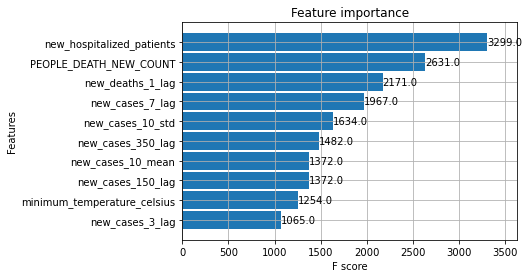

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

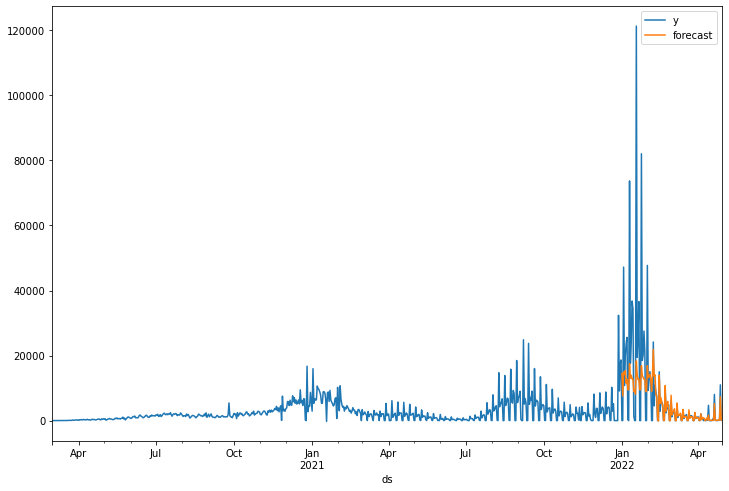

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

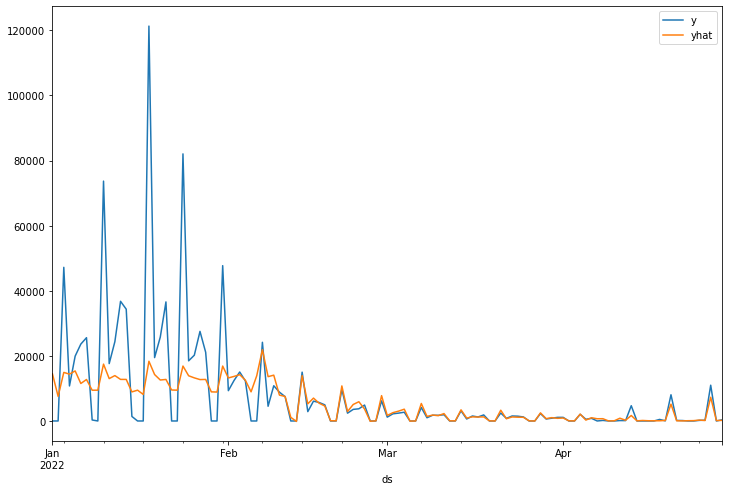

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  14227.911357207657
Test MAE:  5402.227759313183
MASE =  0.580567810716545


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

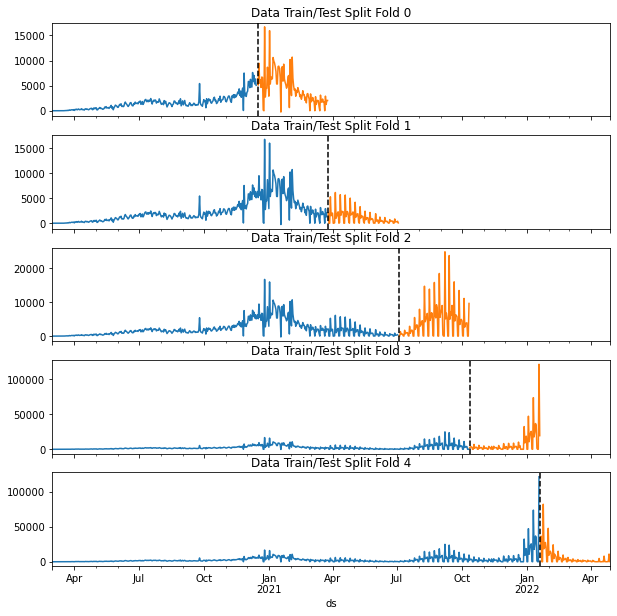

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[01:14:14] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4118.03509	validation_1-rmse:19000.01782
[100]	validation_0-rmse:2006.89630	validation_1-rmse:16563.85284
[200]	validation_0-rmse:1209.04327	validation_1-rmse:15660.08102
[300]	validation_0-rmse:885.65451	validation_1-rmse:15005.48011
[400]	validation_0-rmse:751.27421	validation_1-rmse:14747.25219
[500]	validation_0-rmse:667.33963	validation_1-rmse:14592.72727
[600]	validation_0-rmse:606.93711	validation_1-rmse:14486.22140
[700]	validation_0-rmse:556.31286	validation_1-rmse:14432.31706
[800]	validation_0-rmse:516.76011	validation_1-rmse:14396.56678
[900]	validation_0-rmse:485.27806	validation_1-rmse:14374.99094
[999]	validation_0-rmse:457.51246	validation_1-rmse:14353.23270
[01:14:15] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:

<AxesSubplot:xlabel='ds'>

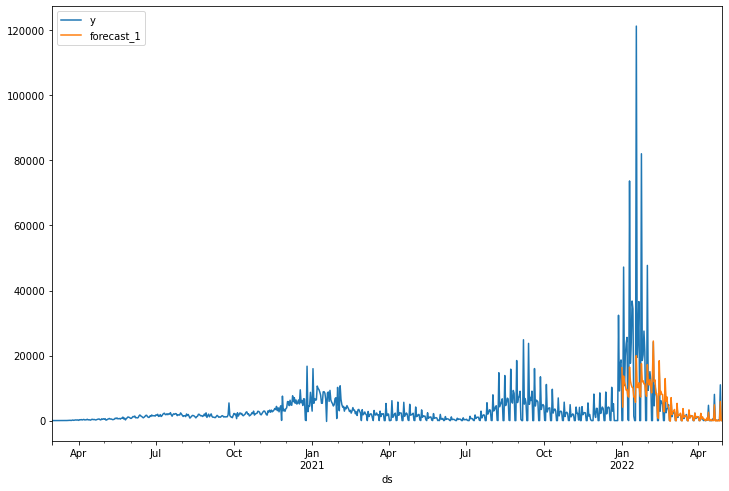

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

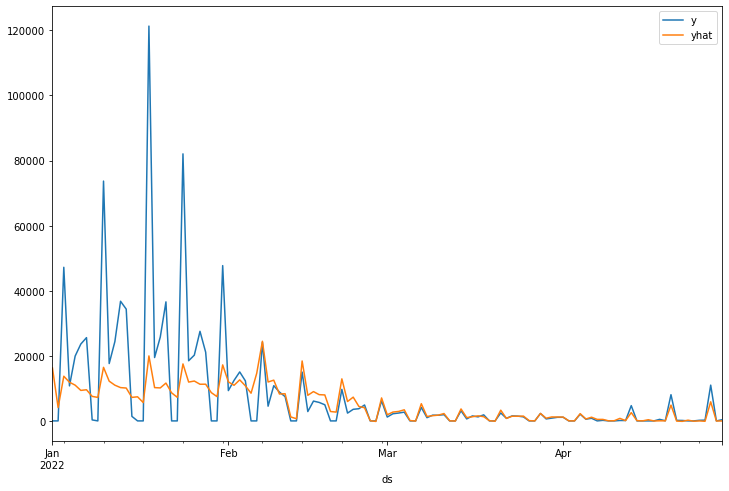

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  14227.911357207657
Test MAE:  5402.227759313183
MASE =  0.580567810716545
